In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Data loading and filtering
energy_data = pd.read_csv('energy_consumption_dataset.csv')
energy_data = energy_data[['Temperature', 'Pressure', 'Humidity', 'MotorSpeed', 'Load', 
                           'VibrationLevel', 'WindSpeed', 'MaterialUsed', 'FuelType', 'EnergyConsumption']]

In [3]:
#data purification
print(energy_data.isnull().sum())
energy_data = energy_data.dropna()
energy_data = pd.get_dummies(energy_data,drop_first=True)

Temperature          0
Pressure             0
Humidity             0
MotorSpeed           0
Load                 0
VibrationLevel       0
WindSpeed            0
MaterialUsed         0
FuelType             0
EnergyConsumption    0
dtype: int64


In [4]:
energy_data.describe()

,Temperature,Pressure,Humidity,MotorSpeed,Load,VibrationLevel,WindSpeed,EnergyConsumption
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,24.904092,151.083150,48.843558,1942.895357,125.024366,2.493309,7.560168,1127.332488
std,5.886811,30.259036,11.337099,652.962617,43.835579,1.419864,4.280015,330.650977
min,15.101232,101.083765,30.185281,814.048918,50.740997,0.137058,0.048274,517.980424
25%,19.781616,124.961492,38.390661,1369.886892,85.575516,1.243027,3.831867,828.380991
50%,25.234355,152.170277,48.114567,2002.034150,124.208947,2.513270,7.780985,1176.035300
75%,30.137192,177.334203,58.679532,2532.367014,160.090291,3.656992,11.361198,1427.719389
max,34.801077,199.971767,69.874970,2995.455043,199.912059,4.983815,14.975213,1702.658604


In [5]:
# Feature and target variables
X = energy_data.drop('EnergyConsumption', axis=1)
Y = energy_data['EnergyConsumption']

In [6]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f'Training Set Size: {X_train.shape[0]}')
print(f'Test Set Size: {X_test.shape[0]}')

Training Set Size: 240
Test Set Size: 60


In [7]:
# Model training
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [8]:
# Model evaluation
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 17.78393152338692
R-squared: 0.9998382971168107


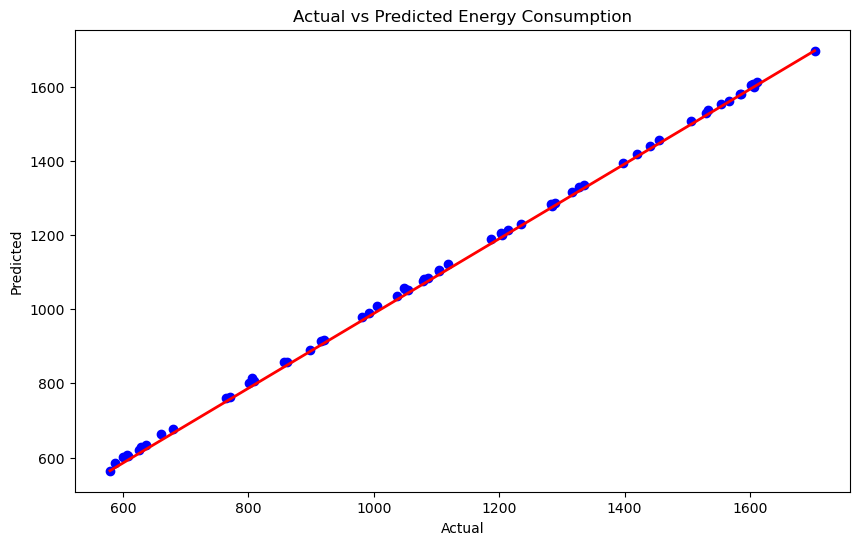

In [9]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Energy Consumption')
plt.show()

In [10]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

                      Coefficient
MaterialUsed_Steel       1.608059
MaterialUsed_Copper      1.177014
MaterialUsed_Plastic     0.719959
Load                     0.599457
MotorSpeed               0.500706
WindSpeed                0.401018
Pressure                 0.377095
VibrationLevel           0.370464
Temperature              0.321797
Humidity                 0.237547
FuelType_Type B          0.233898
FuelType_Type C         -0.082065


In [11]:
# Calculate residuals
residuals = Y_test - y_pred

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


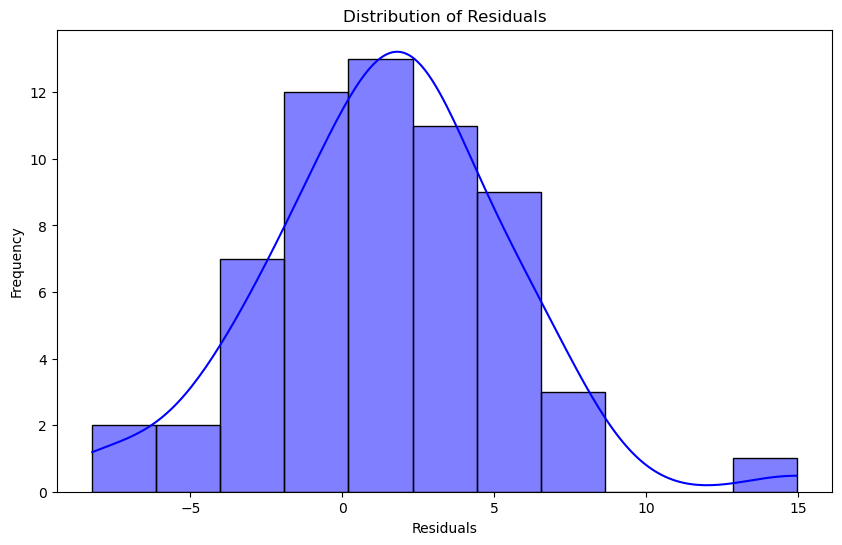

In [12]:
# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

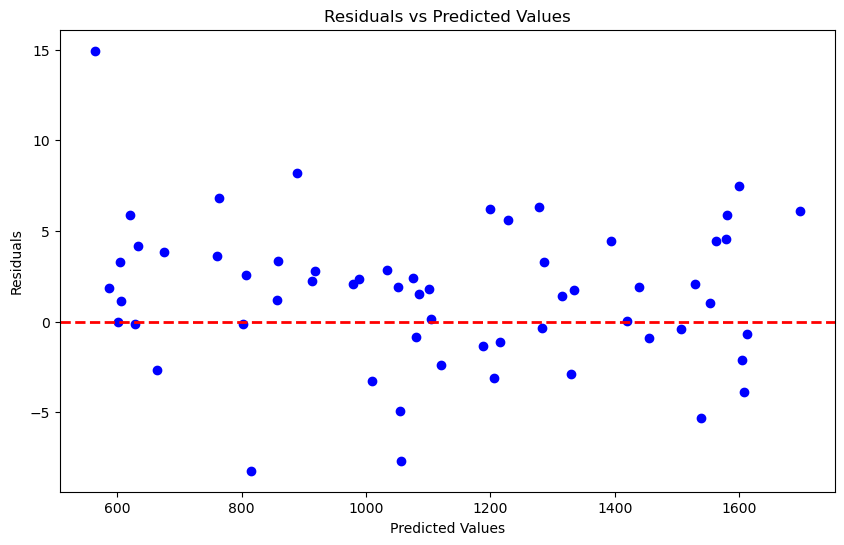

In [13]:
# Residuals vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [14]:
# Identify key features for optimization
threshold = 0.1  important_features = coefficients[coefficients['Coefficient'].abs() > threshold].index.tolist()


In [15]:
# Create optimization strategies
for feature in important_features:
    print(f"To reduce energy consumption, consider optimizing {feature}. "
          f"It has a significant impact on energy use according to the model.")

To reduce energy consumption, consider optimizing Temperature. It has a significant impact on energy use according to the model.
To reduce energy consumption, consider optimizing Pressure. It has a significant impact on energy use according to the model.
To reduce energy consumption, consider optimizing Humidity. It has a significant impact on energy use according to the model.
To reduce energy consumption, consider optimizing MotorSpeed. It has a significant impact on energy use according to the model.
To reduce energy consumption, consider optimizing Load. It has a significant impact on energy use according to the model.
To reduce energy consumption, consider optimizing VibrationLevel. It has a significant impact on energy use according to the model.
To reduce energy consumption, consider optimizing WindSpeed. It has a significant impact on energy use according to the model.
To reduce energy consumption, consider optimizing MaterialUsed_Copper. It has a significant impact on energy u

In [39]:
# Simulate the effect of changing a feature 
feature_to_simulate = 'Load'  
adjustment = 0.9  # Simulating a 10% reduction


In [17]:
# Copying test set for simulation
X_test_simulated = X_test.copy()
X_test_simulated[feature_to_simulate] *= adjustment

In [18]:
# Predict energy consumption with adjusted feature
y_pred_simulated = model.predict(X_test_simulated)

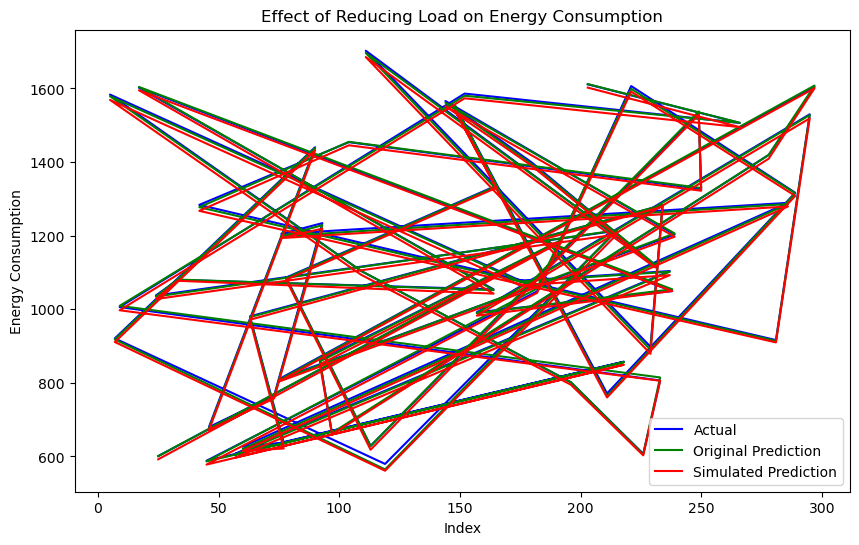

In [19]:
# Compare original vs simulated predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_test.index, Y_test, label='Actual', color='blue')
plt.plot(Y_test.index, y_pred, label='Original Prediction', color='green')
plt.plot(Y_test.index, y_pred_simulated, label='Simulated Prediction', color='red')
plt.xlabel('Index')
plt.ylabel('Energy Consumption')
plt.title(f'Effect of Reducing {feature_to_simulate} on Energy Consumption')
plt.legend()
plt.show()